In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Libraries and Loading the Data

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Data Loading and Initial Exploration

In [ ]:
file_path = '/content/drive/MyDrive/ML_Miniproject2/heart.csv'
heart_data = pd.read_csv(file_path)

heart_data.head(), heart_data.describe(), heart_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


(   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
 0   52    1   0       125   212    0        1      168      0      1.0      2   
 1   53    1   0       140   203    1        0      155      1      3.1      0   
 2   70    1   0       145   174    0        1      125      1      2.6      0   
 3   61    1   0       148   203    0        1      161      0      0.0      2   
 4   62    0   0       138   294    1        1      106      0      1.9      1   
 
    ca  thal  target  
 0   2     3       0  
 1   0     3       0  
 2   0     3       0  
 3   1     3       0  
 4   3     2       0  ,
                age          sex           cp     trestbps        chol  \
 count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
 mean     54.434146     0.695610     0.942439   131.611707   246.00000   
 std       9.072290     0.460373     1.029641    17.516718    51.59251   
 min      29.000000     0.000000     0.000000    94.000000   126.00000 

# Exploratory Data Analysis (EDA)

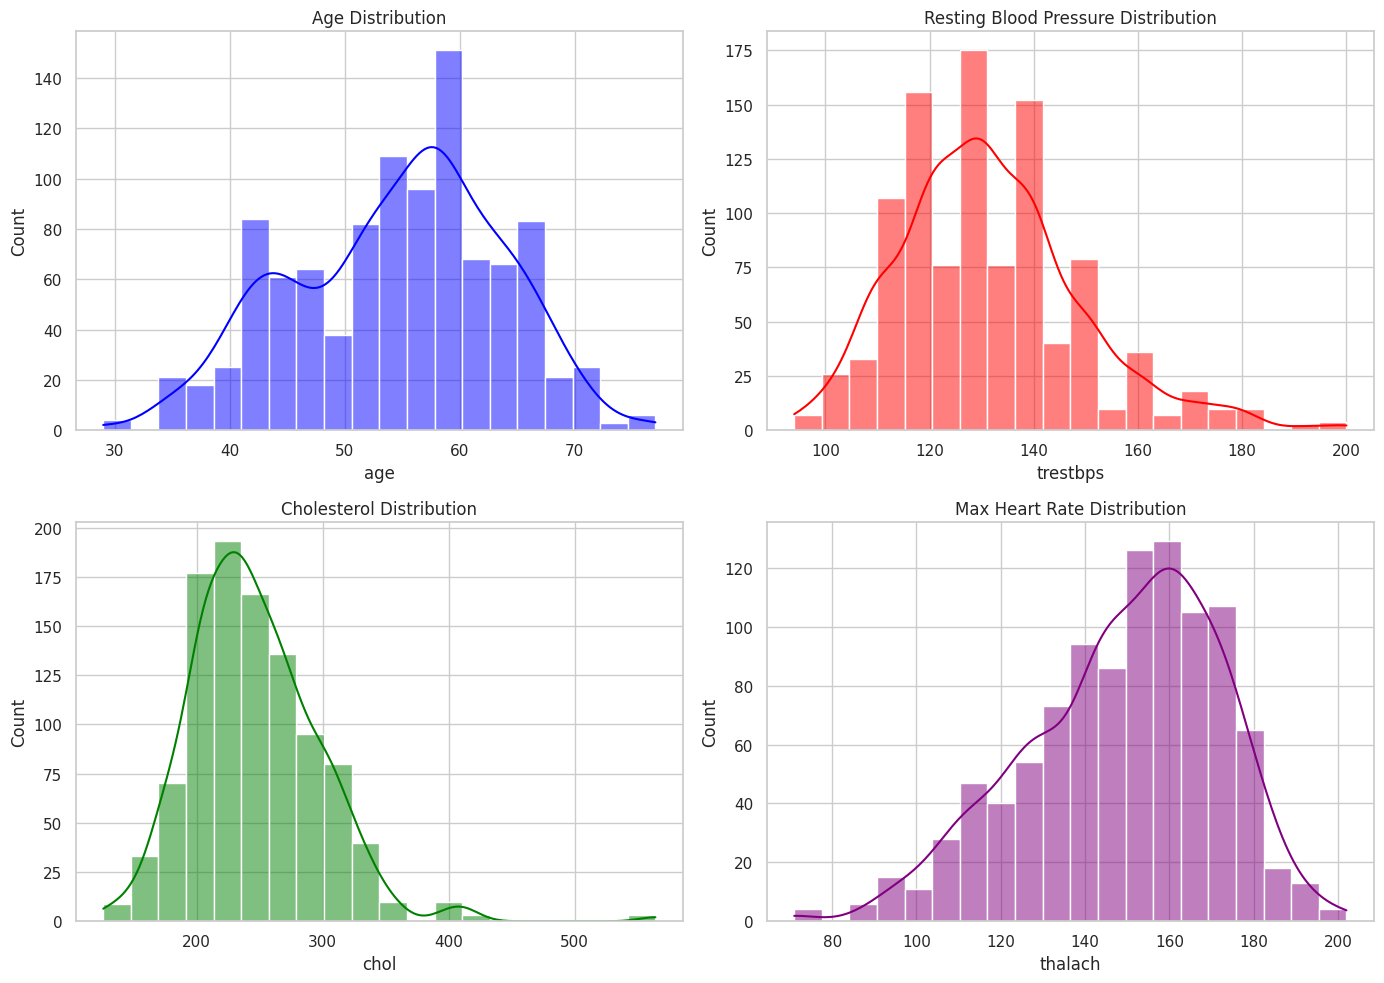

In [ ]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.histplot(heart_data['age'], kde=True, ax=axes[0, 0], color="blue", bins=20)
axes[0, 0].set_title('Age Distribution')
sns.histplot(heart_data['trestbps'], kde=True, ax=axes[0, 1], color="red", bins=20)
axes[0, 1].set_title('Resting Blood Pressure Distribution')
sns.histplot(heart_data['chol'], kde=True, ax=axes[1, 0], color="green", bins=20)
axes[1, 0].set_title('Cholesterol Distribution')
sns.histplot(heart_data['thalach'], kde=True, ax=axes[1, 1], color="purple", bins=20)
axes[1, 1].set_title('Max Heart Rate Distribution')

plt.tight_layout()
plt.show()


# Correlation Matrix

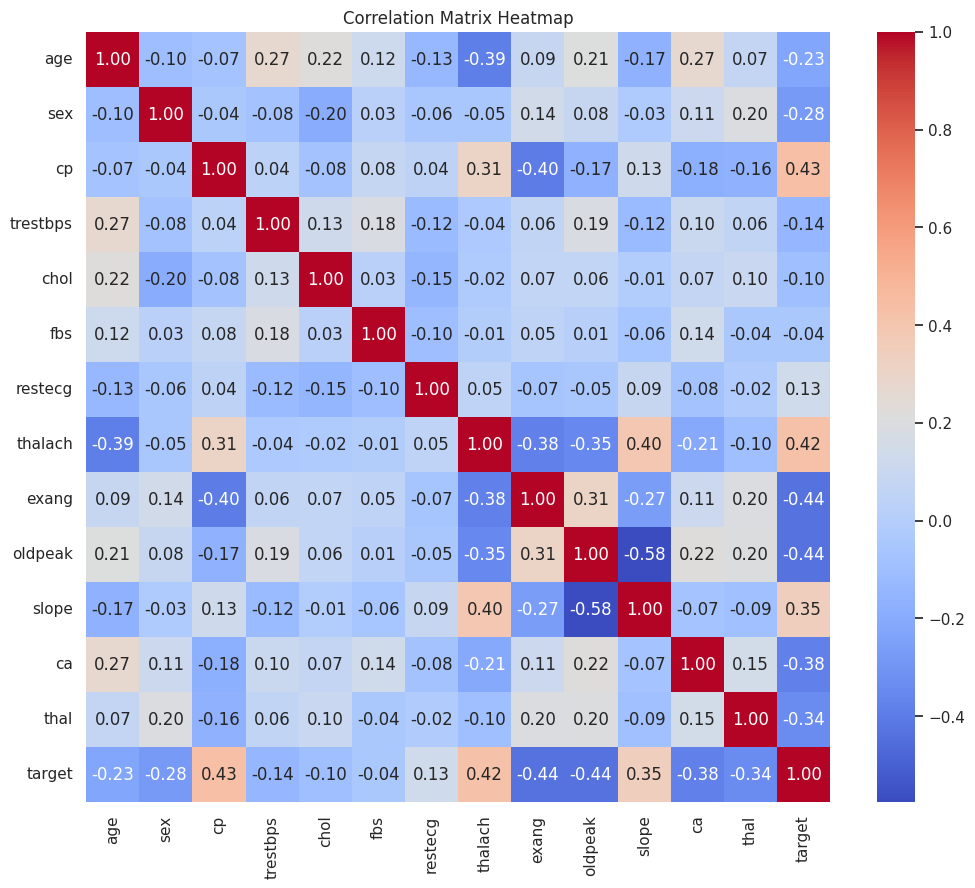

In [ ]:
correlation_matrix = heart_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

# Data Preprocessing

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(heart_data.drop('target', axis=1))
scaled_features


array([[-0.26843658,  0.66150409, -0.91575542, ...,  0.99543334,
         1.20922066,  1.08985168],
       [-0.15815703,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.73197147,  1.08985168],
       [ 1.71659547,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.73197147,  1.08985168],
       ...,
       [-0.81983438,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459, -0.52212231],
       [-0.4889957 , -1.51170646, -0.91575542, ...,  0.99543334,
        -0.73197147, -0.52212231],
       [-0.04787747,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459,  1.08985168]])

# Splitting the Dataset

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(scaled_features, heart_data['target'], test_size=0.2, random_state=4)


# Model Training and Evaluation

In [ ]:
models = {
    "GaussianNB": GaussianNB(),
    "RandomForest": RandomForestClassifier(random_state=4),
    "GradientBoosting": GradientBoostingClassifier(random_state=4)
}

results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = {
        "conf_matrix": conf_matrix,
        "class_report": class_report,
        "accuracy": accuracy
    }

    print(f"Results for {model_name}:")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(class_report)
    print(f"Accuracy: {accuracy}\n")


Results for GaussianNB:
Confusion Matrix:
[[79 28]
 [12 86]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.74      0.80       107
           1       0.75      0.88      0.81        98

    accuracy                           0.80       205
   macro avg       0.81      0.81      0.80       205
weighted avg       0.81      0.80      0.80       205

Accuracy: 0.8048780487804879

Results for RandomForest:
Confusion Matrix:
[[107   0]
 [  0  98]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00        98

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

Accuracy: 1.0

Results for GradientBoosting:
Confusion Matrix:
[[104   3]
 [  3  95]]

Classification Report:
              precision    rec

# Plotting Learning Curves

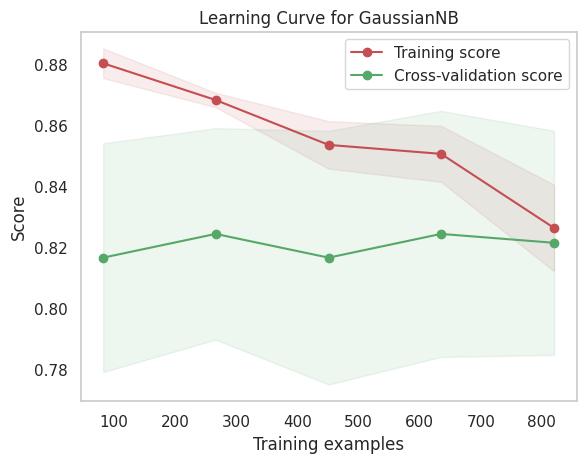

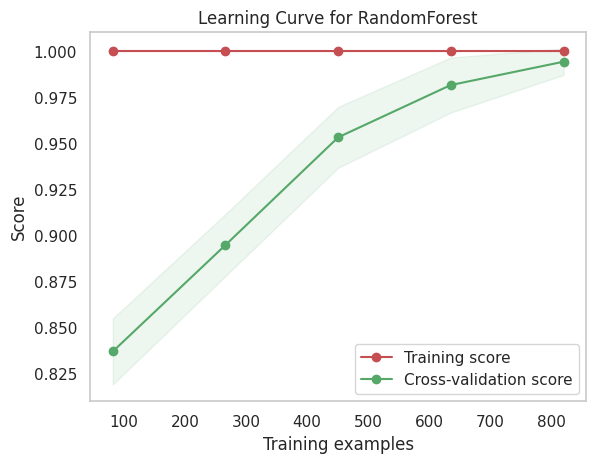

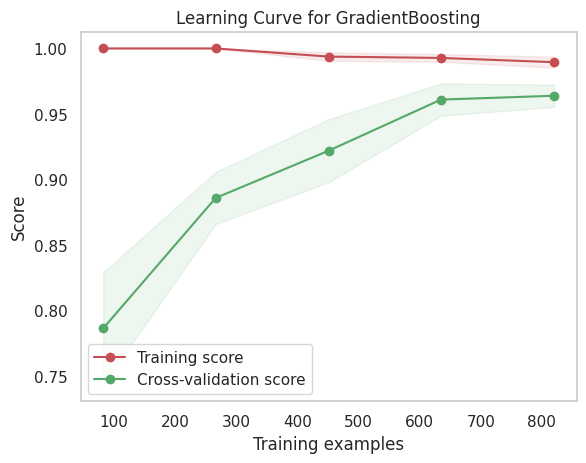

In [ ]:
def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

for model_name, model in models.items():
    plot_learning_curve(model, f"Learning Curve for {model_name}", scaled_features, heart_data['target'], cv=5)
    plt.show()


# Sample Comparison

In [ ]:
np.random.seed(4)
random_indices = np.random.choice(len(X_test), 5, replace=False)
sample_features = X_test[random_indices]
sample_true = y_test.iloc[random_indices]
sample_preds = {model_name: model.predict(sample_features) for model_name, model in models.items()}

sample_comparison = pd.DataFrame({
    "True Labels": sample_true.values
}, index=random_indices)

for model_name, preds in sample_preds.items():
    sample_comparison[f"{model_name} Predicted"] = preds

print("\nSample Comparison:")
print(sample_comparison)



Sample Comparison:
     True Labels  GaussianNB Predicted  RandomForest Predicted  \
1              1                     1                       1   
82             0                     1                       0   
76             0                     0                       0   
102            0                     0                       0   
71             0                     1                       0   

     GradientBoosting Predicted  
1                             1  
82                            0  
76                            0  
102                           0  
71                            0  
